In [ ]:
!pip install pyLDAvis

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/MLOps Hackathon"

dm2_data.csv  dm2.ipynb  networkgraph.ipynb


In [ ]:
!pip install -U nltk

Requirement already up-to-date: nltk in /usr/local/lib/python3.7/dist-packages (3.6.2)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Load the dataset
data = pd.read_csv("/content/gdrive/My Drive/MLOps Hackathon/dm2_data.csv")

In [ ]:
data.head(10)

,Unnamed: 0,title,paragraphs
0,0,s41574-020-00435-4,['COVID-19 and diabetes mellitus: from pathoph...
1,1,7830136,"['HDJDR_7830136 1..7', 'Research ArticleClinic..."
2,2,covid-db2-paper,['Prevention and management of COVID-19 among ...
3,3,fendo-12-609470,['Type 2 Diabetes Mellitus and COVID-19: A Nar...
4,4,511354,['COVID-19 and Diabetes Mellitus: The Link and...


In [ ]:
' '.join(data['paragraphs'][0].split(' '))

"['COVID-19 and diabetes mellitus: from pathophysiology to clinical management', 'Severe acute respiratory syndrome coronavirus 2 (SARS- CoV-2), the novel coronavirus that causes coro-navirus disease 2019 (COVID-19), was first reported in Wuhan, China, in December 2019 and has spread worldwide. As of 29 October 2020, 44,351,506 glob-ally confirmed cases of COVID-19 have been reported on the World Health Organization COVID-19 dash-board, including 1,171,255 deaths. The fatality rate for  COVID-19 has been estimated to be 0.5–1.0%1–3. From 1 March to 30 May 2020, 122,300 excess all- cause deaths occurred in the USA, of which 95,235 (79%) were offi-cially attributed to COVID-19 (ref.4). Of note, mortality from COVID-19 and seasonal influenza is not equiv-alent, as deaths associated with these diseases do not reflect frontline clinical conditions in the same way. For example, COVID-19 pandemic- hit areas have been fac-ing critical shortages in terms of access to supplies such as ventilator

In [ ]:
data.describe

<bound method NDFrame.describe of    Unnamed: 0  ...                                         paragraphs
0           0  ...  ['COVID-19 and diabetes mellitus: from pathoph...
1           1  ...  ['HDJDR_7830136 1..7', 'Research ArticleClinic...
2           2  ...  ['Prevention and management of COVID-19 among ...
3           3  ...  ['Type 2 Diabetes Mellitus and COVID-19: A Nar...
4           4  ...  ['COVID-19 and Diabetes Mellitus: The Link and...

[5 rows x 3 columns]>

In [ ]:
#?WordCloud

In [ ]:
text = ','.join(list(data['paragraphs'].values))

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

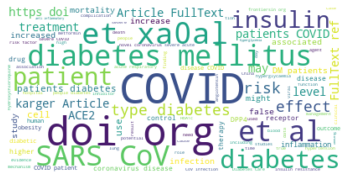

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]

In [ ]:
tokens[:10]

['[',
 "'covid-19",
 'and',
 'diabetes',
 'mellitus',
 ':',
 'from',
 'pathophysiology',
 'to',
 'clinical']

In [ ]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['type','increased','patient','study','patients','et','al','https','use'])
words = [w for w in words if not w in stop_words]
print(words[:100])

['diabetes', 'mellitus', 'pathophysiology', 'clinical', 'management', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', 'sars', 'novel', 'coronavirus', 'causes', 'coronavirus', 'disease', 'first', 'reported', 'wuhan', 'china', 'december', 'spread', 'worldwide', 'october', 'globally', 'confirmed', 'cases', 'reported', 'world', 'health', 'organization', 'dashboard', 'including', 'deaths', 'fatality', 'rate', 'estimated', 'march', 'may', 'excess', 'cause', 'deaths', 'occurred', 'usa', 'officially', 'attributed', 'note', 'mortality', 'seasonal', 'influenza', 'equivalent', 'deaths', 'associated', 'diseases', 'reflect', 'frontline', 'clinical', 'conditions', 'way', 'example', 'pandemic', 'hit', 'areas', 'facing', 'critical', 'shortages', 'terms', 'access', 'supplies', 'ventilators', 'intensive', 'care', 'unit', 'icu', 'sars', 'positive', 'stranded', 'rna', 'virus', 'enclosed', 'protein', 'decorated', 'lipid', 'bilayer', 'containing', 'single', 'stranded', 'rna', 'genome', 'sars', 

In [ ]:
word_string = ' '.join(words)

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_string)

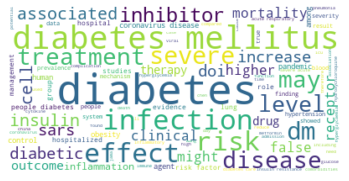

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https','www','doi','org','et','al','xa','dm','com','dpp','ref'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data.paragraphs.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['covid', 'diabetes', 'mellitus', 'pathophysiology', 'clinical', 'management', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', 'sars', 'cov', 'novel', 'coronavirus', 'causes', 'coro', 'navirus', 'disease', 'covid', 'first', 'reported', 'wuhan', 'china', 'december', 'spread', 'worldwide', 'october', 'glob', 'ally']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 5), (1, 1), (2, 1), (3, 1), (4, 4), (5, 3), (6, 1), (7, 1), (8, 2), (9, 2), (10, 2), (11, 3), (12, 2), (13, 5), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 45), (21, 1), (22, 4), (23, 3), (24, 2), (25, 1), (26, 3), (27, 3), (28, 2), (29, 7)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"covid" + 0.020*"diabetes" + 0.015*"patients" + 0.006*"insulin" + '
  '0.006*"disease" + 0.006*"coronavirus" + 0.006*"sars" + 0.005*"cov" + '
  '0.005*"ace" + 0.004*"risk"'),
 (1,
  '0.020*"covid" + 0.020*"diabetes" + 0.017*"patients" + 0.006*"disease" + '
  '0.006*"risk" + 0.005*"cov" + 0.005*"glucose" + 0.005*"type" + '
  '0.005*"mellitus" + 0.004*"sars"'),
 (2,
  '0.018*"diabetes" + 0.018*"covid" + 0.015*"patients" + 0.006*"disease" + '
  '0.005*"type" + 0.005*"cov" + 0.004*"risk" + 0.004*"glucose" + '
  '0.004*"infection" + 0.004*"sars"'),
 (3,
  '0.016*"patients" + 0.016*"covid" + 0.013*"diabetes" + 0.005*"risk" + '
  '0.005*"cov" + 0.004*"severe" + 0.004*"ace" + 0.004*"infection" + '
  '0.004*"disease" + 0.004*"glucose"'),
 (4,
  '0.019*"covid" + 0.018*"patients" + 0.018*"diabetes" + 0.006*"cov" + '
  '0.005*"risk" + 0.005*"glucose" + 0.005*"clinical" + 0.004*"insulin" + '
  '0.004*"disease" + 0.004*"mellitus"'),
 (5,
  '0.021*"patients" + 0.018*"covid" + 0.012*"dia

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.005113 -0.007133       1        1  42.047127
1     -0.000073  0.002183       2        1  19.211304
8      0.007916  0.001121       3        1  15.002789
0      0.001251 -0.001049       4        1  13.986857
5     -0.009587 -0.005091       5        1   9.485547
9     -0.003068 -0.000244       6        1   0.259639
4      0.000791  0.000226       7        1   0.001685
2      0.000787  0.000710       8        1   0.001685
7      0.000099  0.002628       9        1   0.001684
3     -0.003229  0.006651      10        1   0.001684, topic_info=             Term        Freq       Total Category  logprob  loglift
601         covid  680.000000  680.000000  Default  30.0000  30.0000
1955     patients  543.000000  543.000000  Default  29.0000  29.0000
727      diabetes  534.000000  534.000000  Default  28.0000  28.0000
599           cov  150.000000  150.000000  Default  27.0000  27.0000
765       disease  161.000000  161.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
579   coronavirus    0.001395  142.706421  Topic10  -5.8815  -0.5440
367          care    0.001143   85.278551  Topic10  -6.0813  -0.2289
2379         sars    0.001377  156.128936  Topic10  -5.8946  -0.6469
2303  respiratory    0.001088   76.231538  Topic10  -6.1304  -0.1659
187       article    0.001101   98.707355  Topic10  -6.1186  -0.4124

[851 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2959      1  0.365557  abbreviations
2959      2  0.365557  abbreviations
2959      5  0.365557  abbreviations
8         1  0.421048             ac
8         2  0.210524             ac
...     ...       ...            ...
2948      3  0.119634           yuan
2948      4  0.119634           yuan
3574      1  0.258250             μg
3574      2  0.258250             μg
3574      5  0.258250             μg

[1465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 9, 1, 6, 10, 5, 3, 8, 4])